In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Inisiasi dataset

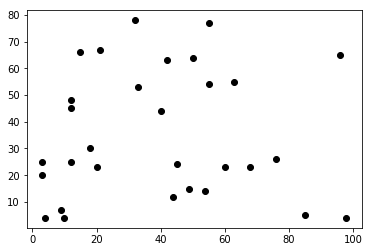

In [2]:
df = pd.DataFrame({
    'x' : [10, 12, 15, 20, 45, 33, 21, 55, 32, 12, 96, 55, 68, 98, 49, 60, 44, 50, 9, 85, 4, 63, 3, 18, 40, 54, 3, 76, 12, 42],
    'y' : [4, 25, 66, 23, 24, 53, 67, 54, 78, 45, 65, 77, 23, 4, 15, 23, 12, 64, 7, 5, 4, 55, 20, 30, 44, 14, 25, 26, 48, 63]
})

x = df["x"]
y = df["y"]
plt.plot(x,y,"ko")
plt.show()

# Bangkitkan titik random sebagai centroid awal
Memilih 'k' titik acak dari dataset sebagai centroid awal

In [3]:
def first_centroid(k):    
    cent_x = []
    cent_y = []
    for i in range(k) :
        r = (np.random.randint(len(x)))
        cent_x.append(x[r])
        cent_y.append(y[r])
    return(cent_x, cent_y)

# Menghitung distance setiap data terhadap centroid
Perhitungan distance menggunakan euclidean distance

In [4]:
def distance(pointx,pointy):
    distances = []
    for i in range(len(x)) :
        dist = []
        for j in range(k) :
            euc = np.sqrt((pointx[j]-x[i])**2 + (pointy[j]-y[i])**2)
            dist.append(euc)
        distances.append(dist)
    return distances

# Memetakan setiap titik ke cluster
Setelah mendapatkan distance setiap titik ke centroid, pilih jarak paling minimal (berdasarkan indexnya). nilai 0 artinya titik paling dekat dengan centroid[0], nilai 1 artinya titik paling dekat dengan centroid[1], dst

In [5]:
def minimum(distance):
    m = []
    for i in range(len(x)):
        m.append(distance[i].index(min(distance[i])))
    return m

# Membangkitkan centroid baru
Menggunakan teknik average

In [6]:
def new_centroid(m):
    cent_x,cent_y = [],[]
    for i in range(k):
        sum_x,sum_y,count = 0,0,0
        for j in range(len(x)):
            if (m[j] == i):
                sum_x += x[j]
                sum_y += y[j]
                count += 1
        if (count != 0) :
            cent_x.append((sum_x/count))
            cent_y.append((sum_y/count))
        if (count == 0):
            cent_x.append(0)
            cent_y.append(0)
    return cent_x, cent_y

# Driver program
Melakukan perulangan hingga centroid baru sama dengan centroid sebelumnya

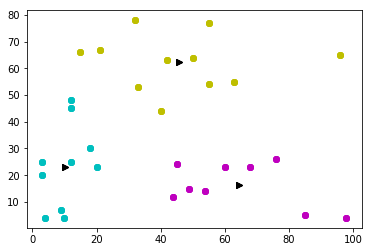

In [7]:
k = 3
cent_x,cent_y = first_centroid(k)[0], first_centroid(k)[1]
prev_cent_x,prev_cent_y = [],[]
while ((prev_cent_x != cent_x) or (prev_cent_y != cent_y)) :
    prev_cent_x = cent_x
    prev_cent_y = cent_y
    distances = distance(cent_x,cent_y)
    m = minimum(distances)
    centroid = new_centroid(m)
    cent_x = centroid[0]
    cent_y = centroid[1]
    
result = [[],[],[]]
for j in range(k):    
    plt.plot(cent_x, cent_y, 'k>')
    for i in range(30):
        if (m[i] == 0) :
            plt.plot(x[i], y[i], 'co')    
            result[j].append((x[i], y[i], j))
        elif (m[i] == 1) :
            plt.plot(x[i], y[i], 'mo')    
            result[j].append((x[i], y[i], j))
        elif(m[i] == 2):
            plt.plot(x[i], y[i], 'yo')    
            result[j].append((x[i], y[i], j))
plt.show()

# Experiment dengan menggunakan library

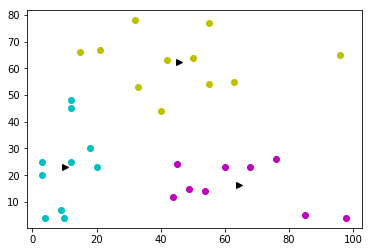

In [8]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
for i in range(30):
    if(km.labels_[i] == 0):
        plt.plot(df['x'][i], df['y'][i], 'co')
    if(km.labels_[i] == 1):
        plt.plot(df['x'][i], df['y'][i], 'mo')
    if(km.labels_[i] == 2):
        plt.plot(df['x'][i], df['y'][i], 'yo')

for i in range(3):
    plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], 'k>')
        
plt.show()